In [6]:
import numpy as np
import xarray as xr
import intake

In [7]:
cat = intake.open_catalog('catalogs/Cant_Gruber2019.yml')
cat

Cant_Gruber2019:
  args:
    path: catalogs/Cant_Gruber2019.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [27]:
ds = cat.Cant_Gruber2019().to_dask().rename({'LONGITUDE': 'lon', 'LATITUDE': 'lat', 'DEPTH': 'depth'})
edges = (ds.depth.values[:-1] + ds.depth.values[1:]) / 2.
ds['depth_edges'] = xr.DataArray(
        np.concatenate(([0.], edges, [6500.])), dims=('depth_edges')
)
ds['dz'] = ds.depth_edges.diff('depth_edges')
ds

<xarray.Dataset>
Dimensions:         (bnds: 2, depth: 33, depth_edges: 34, lat: 180, lon: 360)
Coordinates:
  * depth_edges     (depth_edges) float64 0.0 5.0 15.0 ... 5.25e+03 6.5e+03
  * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * depth           (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
Dimensions without coordinates: bnds
Data variables: (12/20)
    DEPTH_bnds      (depth, bnds) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
    MASK            (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    OCEAN_MASK      (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    GAMMA_DENS      (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    DCANT_01        (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    DCANT_02        (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    ...              ...
    DCANT_11        (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    DCANT_12        (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    DCANT_13        (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    DCANT_14        (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    SIGMA_DCANT_01  (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    dz              (depth_edges) float64 nan 5.0 10.0 ... 500.0 500.0 1.25e+03
Attributes:
    history:      created by Nicolas Gruber on February 18, 2019
    Conventions:  CF-1.0
    title:        Change in Anthropogenic CO2 between 1994 and 2007, based on...
    version:      Version 1.0

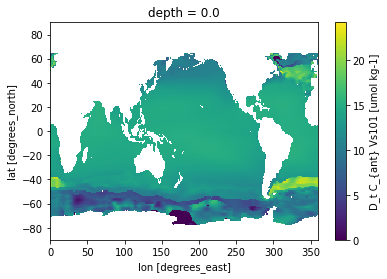

In [13]:
ds.DCANT_01.isel(depth=0).plot()

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import glodap
ds = glodap.open_glodap('GLODAPv1+Gruber2019')
ds

<xarray.Dataset>
Dimensions:             (depth: 33, lat: 180, lon: 360)
Coordinates:
  * lon                 (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float64 0.0 10.0 20.0 ... 4.5e+03 5e+03 5.5e+03
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Data variables:
    Cant_v1pGruber2019  (depth, lat, lon) float64 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    dz                  (depth) float64 ...
    area                (lat, lon) float64 ...

In [25]:
ds1 = glodap._gen_Gruber2019_dataset()
ds1

<xarray.Dataset>
Dimensions:   (depth: 33, lat: 180, lon: 360)
Coordinates:
  * lon       (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * depth     (depth) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
Data variables:
    DCANT_01  (depth, lat, lon) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
Attributes:
    history:      created by Nicolas Gruber on February 18, 2019
    Conventions:  CF-1.0
    title:        Change in Anthropogenic CO2 between 1994 and 2007, based on...
    version:      Version 1.0

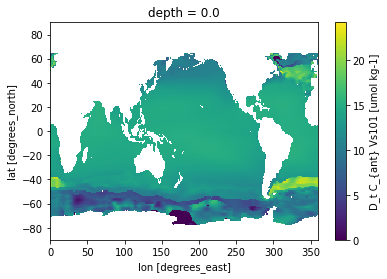

In [26]:
ds1.DCANT_01.isel(depth=0).plot()

In [27]:
ds2 = glodap._gen_v1_dataset()
ds2

<xarray.Dataset>
Dimensions:     (bnds: 2, depth: 33, lat: 180, lon: 360)
Coordinates:
  * depth       (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (depth, bnds) float64 ...
    dz          (depth) float64 ...
    ALK         (depth, lat, lon) float64 ...
    Cant_v1     (depth, lat, lon) float64 ...
    BkgC14      (depth, lat, lon) float64 ...
    Del14C      (depth, lat, lon) float64 ...
    CFC11       (depth, lat, lon) float64 ...
    CFC12       (depth, lat, lon) float64 ...
    DIC         (depth, lat, lon) float64 ...
    pCFC11      (depth, lat, lon) float64 ...
    pCFC12      (depth, lat, lon) float64 ...
    area        (lat, lon) float64 ...

In [49]:
import numpy as np

ds = glodap._gen_Gruber2019_dataset()

ndx0 = np.where(ds2.lon>=0)[0]
ndx1 = np.where(ds2.lon<0)[0]

ds = xr.concat((ds2.isel(lon=ndx0), ds2.isel(lon=ndx1)), dim='lon')
ds['lon'] = xr.where(ds.lon < 0, ds.lon + 360., ds.lon)
ds

<xarray.Dataset>
Dimensions:     (bnds: 2, depth: 33, lat: 180, lon: 360)
Coordinates:
  * depth       (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (lon, depth, bnds) float64 -5.0 5.0 5.0 ... 5.25e+03 5.75e+03
    dz          (lon, depth) float64 10.0 10.0 10.0 15.0 ... 500.0 500.0 500.0
    ALK         (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    Cant_v1     (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    BkgC14      (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    Del14C      (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    CFC11       (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    CFC12       (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    DIC         (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    pCFC11      (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    pCFC12      (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    area        (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08

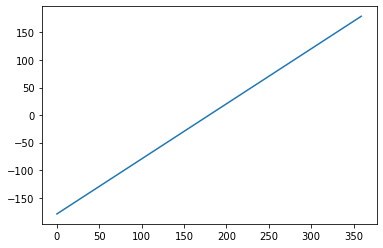

In [53]:
ds = glodap._gen_Gruber2019_dataset()

ndx0 = np.where(ds1.lon > 180.)[0]
ndx1 = np.where(ds1.lon < 180.)[0]
ds = xr.concat((ds1.isel(lon=ndx0), ds1.isel(lon=ndx1)), dim='lon')
ds['lon'] = xr.where(ds.lon > 180., ds.lon - 360., ds.lon)

import matplotlib.pyplot as plt
plt.plot(ds.lon)

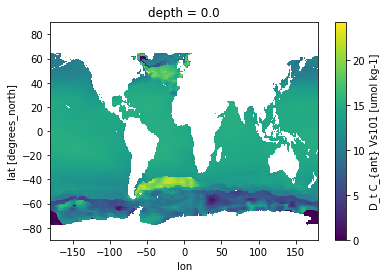

In [54]:
ds.DCANT_01.isel(depth=0).plot()

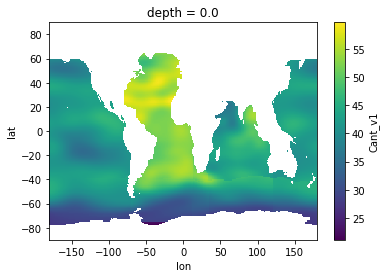

In [56]:
ds1 = glodap._gen_v1_dataset()
ds1.Cant_v1.isel(depth=0).plot()

In [57]:
assert (ds1.lon == ds.lon).all()

In [24]:
ds.lon

<xarray.DataArray 'lon' (lon: 360)>
array([ 20.5,  21.5,  22.5, ..., 377.5, 378.5, 379.5])
Coordinates:
  * lon      (lon) float64 20.5 21.5 22.5 23.5 24.5 ... 376.5 377.5 378.5 379.5
Attributes:
    units:        degrees east
    Description:  This number represents the mid-point of the 1x1 degree grid...